# AV3 - Resolução de problemas por GAs

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import mode

## Hill Climbing

In [3]:
class HillClimber:
    def __init__(self, objective_function, optimization_type, domain, num_rounds, sigma=0.1):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.sigma = sigma
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._hill_climb(num_iterations, self.sigma)
            self.solutions.append(solution)

        mode_solution = mode(self.solutions, axis=0)
        print(f"Moda das soluções encontradas: {mode_solution}, f({mode_solution}) = {self.objective_function(*mode_solution)}")

    def _hill_climb(self, num_iterations, sigma):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            n = np.random.normal(0, sigma, size=len(x_best))
            x_cand = x_best + n
            x_cand = np.clip(x_cand, [self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def     plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')
        
        plt.title('Resultados do Hill Climber')
        plt.show()

## Local Random Search

In [4]:
class LRS:
    def __init__(self, objective_function, optimization_type, domain, num_rounds, sigma):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.sigma = sigma
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._local_random_search(num_iterations, self.sigma)
            self.solutions.append(solution)

        mode_solution = mode(self.solutions, axis=0)
        mode_value = self.objective_function(*mode_solution)

        optimization_desc = "mínimo" if self.optimization_type == "minimization" else "máximo"
        print(f"Moda das soluções encontradas: {mode_solution}, f({mode_solution}) = {mode_value} ({optimization_desc})")

    def _local_random_search(self, num_iterations, sigma):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            n = np.random.normal(0, sigma, size=len(x_best))  # Perturbação local
            x_cand = x_best + n
            x_cand = np.clip(x_cand, [self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            # Verifica se é uma minimização ou maximização
            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')

        ax.legend()
        plt.title('Resultados do LRS')
        plt.show()

## Global Random Search

In [5]:
class GRS:
    def __init__(self, objective_function, optimization_type, domain, num_rounds):
        self.objective_function = objective_function
        self.optimization_type = optimization_type
        self.domain = domain
        self.num_rounds = num_rounds
        self.solutions = []

    def run(self, num_iterations=1000):
        for _ in range(self.num_rounds):
            solution = self._global_random_search(num_iterations)
            self.solutions.append(solution)

        mode_solution = mode(self.solutions, axis=0)
        mode_value = self.objective_function(*mode_solution)

        optimization_desc = "mínimo" if self.optimization_type == "minimization" else "máximo"
        print(f"Moda das soluções encontradas: {mode_solution}, f({mode_solution}) = {mode_value} ({optimization_desc})")

    def _global_random_search(self, num_iterations):
        x_best = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
        f_best = self.objective_function(*x_best)

        for _ in range(num_iterations):
            x_cand = np.random.uniform([self.domain[0][0], self.domain[1][0]], [self.domain[0][1], self.domain[1][1]])
            f_cand = self.objective_function(*x_cand)

            if self.optimization_type == 'minimization' and f_cand < f_best:
                x_best, f_best = x_cand, f_cand
            elif self.optimization_type == 'maximization' and f_cand > f_best:
                x_best, f_best = x_cand, f_cand

        return x_best

    def plot_results(self):
        x1_min, x1_max = self.domain[0]
        x2_min, x2_max = self.domain[1]

        X = np.linspace(x1_min, x1_max, 1000)
        Y = np.linspace(x2_min, x2_max, 1000)
        X, Y = np.meshgrid(X, Y)
        Z = self.objective_function(X, Y)

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.2)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel(f'f(x1, x2)')

        if self.optimization_type == 'minimization':
            min_index = np.argmin([self.objective_function(*sol) for sol in self.solutions])
            min_solution = self.solutions[min_index]
            ax.scatter(min_solution[0], min_solution[1], self.objective_function(*min_solution), color='red', s=100, label='Mínimo Encontrado', edgecolors='k')
        elif self.optimization_type == 'maximization':
            max_index = np.argmax([self.objective_function(*sol) for sol in self.solutions])
            max_solution = self.solutions[max_index]
            ax.scatter(max_solution[0], max_solution[1], self.objective_function(*max_solution), color='blue', s=100, label='Máximo Encontrado', edgecolors='k')

        ax.legend()
        plt.title('Resultados do GRS')
        plt.show()

## Parte 1 - Minimizações e Maximizações

### Q1 - 1

Moda das soluções encontradas: ModeResult(mode=array([-66.74413561, -63.86934844]), count=array([1., 1.])), f(ModeResult(mode=array([-66.74413561, -63.86934844]), count=array([1., 1.]))) = [4455.77963796 4080.2936696 ]


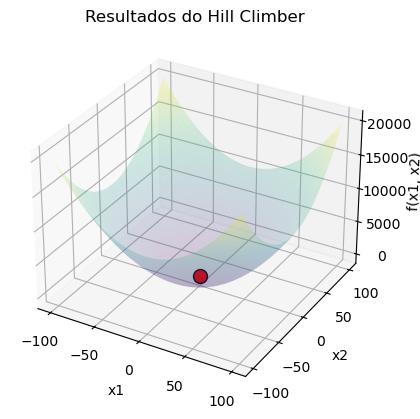

Moda das soluções encontradas: ModeResult(mode=array([-70.82744627, -67.88964071]), count=array([1., 1.])), f(ModeResult(mode=array([-70.82744627, -67.88964071]), count=array([1., 1.]))) = [5017.52714515 4610.00331524] (mínimo)


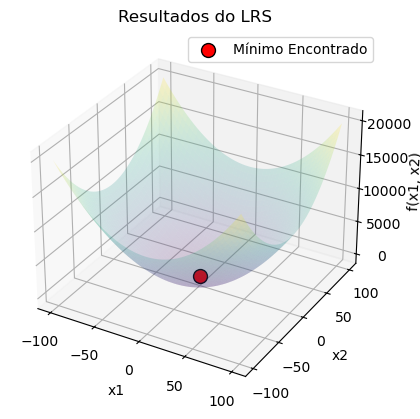

Moda das soluções encontradas: ModeResult(mode=array([-5.84240548, -5.98329952]), count=array([1., 1.])), f(ModeResult(mode=array([-5.84240548, -5.98329952]), count=array([1., 1.]))) = [35.13370179 36.79987319] (mínimo)


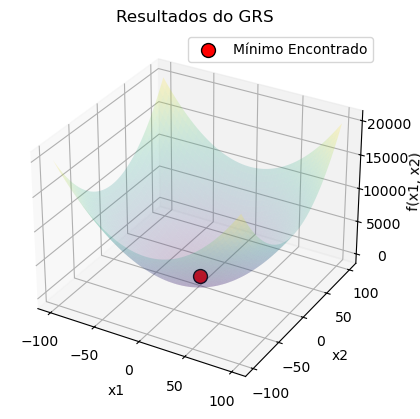

In [6]:
def f(x1, x2):
    return x1**2 + x2**2

num_rounds = 100
optimization_type = 'minimization'
domain = [(-100, 100), (-100, 100)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 2

Moda das soluções encontradas: ModeResult(mode=array([0.90233823, 0.90381449]), count=array([1., 1.])), f(ModeResult(mode=array([0.90233823, 0.90381449]), count=array([1., 1.]))) = [2.14398094 2.14411398]


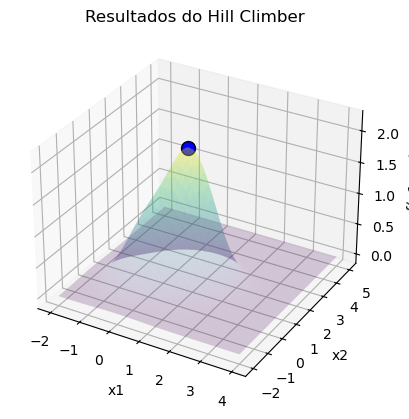

Moda das soluções encontradas: ModeResult(mode=array([0.90620283, 0.90506632]), count=array([1., 1.])), f(ModeResult(mode=array([0.90620283, 0.90506632]), count=array([1., 1.]))) = [2.14431222 2.14422051] (máximo)


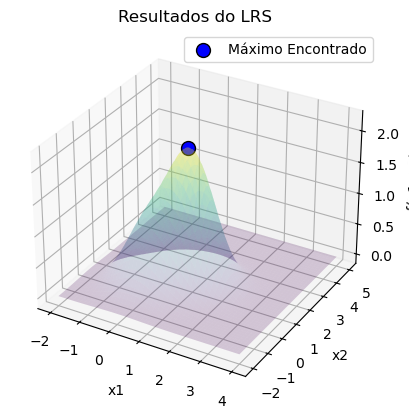

Moda das soluções encontradas: ModeResult(mode=array([0.62186295, 0.64047354]), count=array([1., 1.])), f(ModeResult(mode=array([0.62186295, 0.64047354]), count=array([1., 1.]))) = [1.98342482 2.00158511] (máximo)


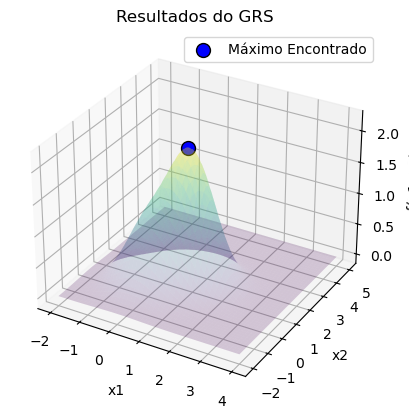

In [30]:
def f(x1, x2):
    return np.exp(-(x1**2 + x2**2)) + 2*np.exp(-((x1 - 1)**2 + (x2 - 1)**2))

num_rounds = 100
optimization_type = 'maximization'
domain = [(-2, 4), (-2, 5)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 3

Moda das soluções encontradas: ModeResult(mode=array([-7.98928711, -7.99323466]), count=array([1., 1.])), f(ModeResult(mode=array([-7.98928711, -7.99323466]), count=array([1., 1.]))) = [13.5981963  13.59989468]


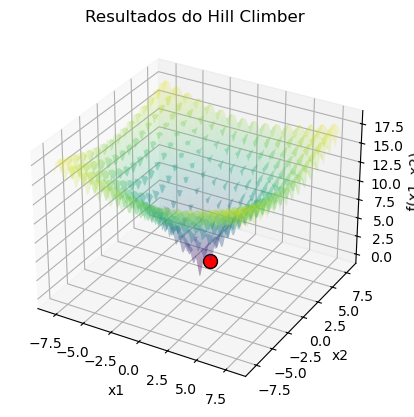

Moda das soluções encontradas: ModeResult(mode=array([-6.98760266, -7.992837  ]), count=array([1., 1.])), f(ModeResult(mode=array([-6.98760266, -7.992837  ]), count=array([1., 1.]))) = [12.63374844 13.59968593] (mínimo)


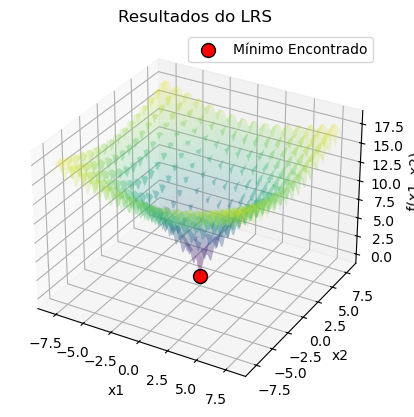

Moda das soluções encontradas: ModeResult(mode=array([-1.07755953, -1.00490903]), count=array([1., 1.])), f(ModeResult(mode=array([-1.07755953, -1.00490903]), count=array([1., 1.]))) = [3.90794614 3.63407755] (mínimo)


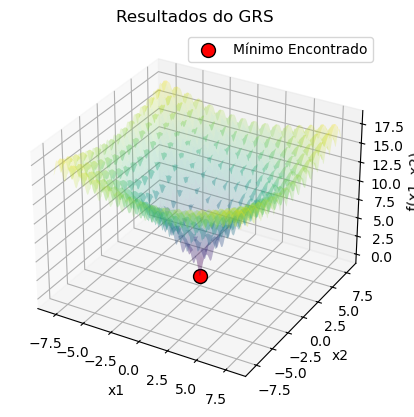

In [12]:
def f(x1, x2):
    return -20 * np.exp(-0.2*np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + 20 + np.exp(1)

num_rounds = 100
optimization_type = 'minimization'
domain = [(-8, 8), (-8,8)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 4

Moda das soluções encontradas: ModeResult(mode=array([-4.97774971, -4.97950037]), count=array([1., 1.])), f(ModeResult(mode=array([-4.97774971, -4.97950037]), count=array([1., 1.]))) = [25.87555708 25.87826036]


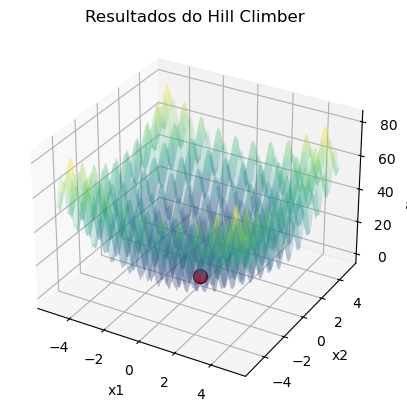

Moda das soluções encontradas: ModeResult(mode=array([-4.97797568, -4.97930206]), count=array([1., 1.])), f(ModeResult(mode=array([-4.97797568, -4.97930206]), count=array([1., 1.]))) = [25.87583829 25.8778936 ] (mínimo)


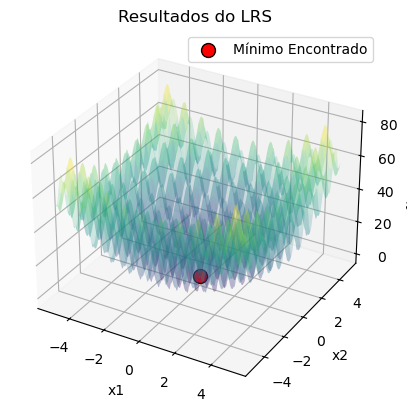

Moda das soluções encontradas: ModeResult(mode=array([-1.07391664, -1.05004346]), count=array([1., 1.])), f(ModeResult(mode=array([-1.07391664, -1.05004346]), count=array([1., 1.]))) = [3.21253545 2.59287032] (mínimo)


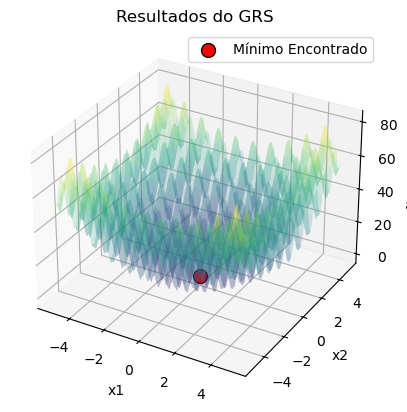

In [13]:
def f(x1, x2):
    return (x1**2 - 10 * np.cos(2 * np.pi * x1) + 10) + (x2**2 - 10 * np.cos(2 * np.pi * x2) + 10)

num_rounds = 100
optimization_type = 'minimization'
domain = [(-5.12, 5.12), (-5.12, 5.12)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 5

Moda das soluções encontradas: ModeResult(mode=array([ -9.7339424, -10.       ]), count=array([ 1., 56.])), f(ModeResult(mode=array([ -9.7339424, -10.       ]), count=array([ 1., 56.]))) = [ 0.36628248 -5.18046424]


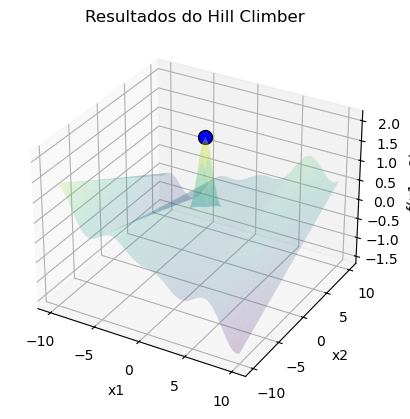

Moda das soluções encontradas: ModeResult(mode=array([ -9.73485484, -10.        ]), count=array([ 1., 46.])), f(ModeResult(mode=array([ -9.73485484, -10.        ]), count=array([ 1., 46.]))) = [ 0.36618149 -4.18046424] (máximo)


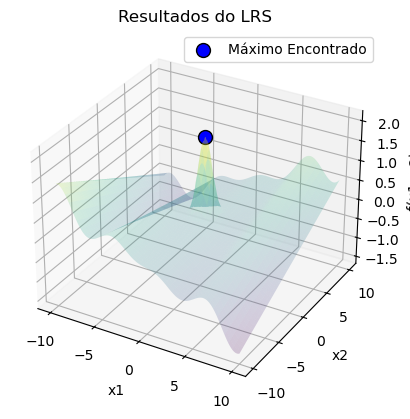

Moda das soluções encontradas: ModeResult(mode=array([-9.82951998, -9.92150526]), count=array([1., 1.])), f(ModeResult(mode=array([-9.82951998, -9.92150526]), count=array([1., 1.]))) = [0.35347151 0.33690797] (máximo)


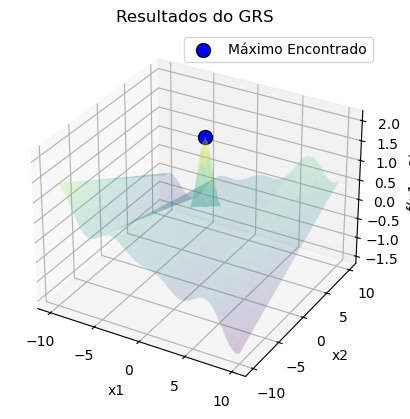

In [14]:
def f(x1, x2):
    return (x1 * np.cos(x1))/20 + 2 * np.exp(-(x1)**2 - (x2 - 1)**2) + 0.01 * x1 * x2

num_rounds = 100
optimization_type = 'maximization'
domain = [(-10, 10), (-10, 10)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 6

Moda das soluções encontradas: ModeResult(mode=array([-0.64335454, -0.88639463]), count=array([1., 1.])), f(ModeResult(mode=array([-0.64335454, -0.88639463]), count=array([1., 1.]))) = [1.62631723 0.12267679]


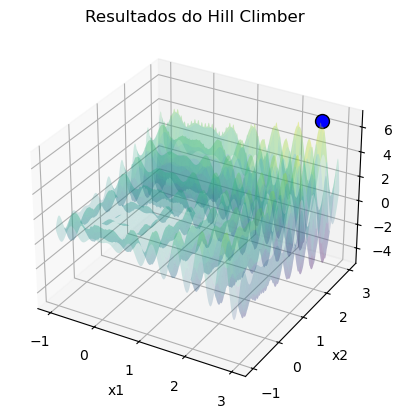

Moda das soluções encontradas: ModeResult(mode=array([-0.6360096 , -0.88871616]), count=array([1., 1.])), f(ModeResult(mode=array([-0.6360096 , -0.88871616]), count=array([1., 1.]))) = [1.6299324  0.12445252] (máximo)


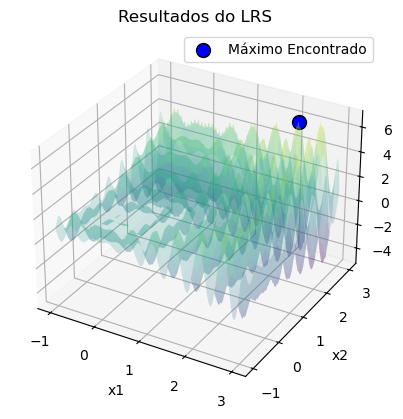

Moda das soluções encontradas: ModeResult(mode=array([1.60355076, 1.85863277]), count=array([1., 1.])), f(ModeResult(mode=array([1.60355076, 1.85863277]), count=array([1., 1.]))) = [ 2.54565251 -0.81945837] (máximo)


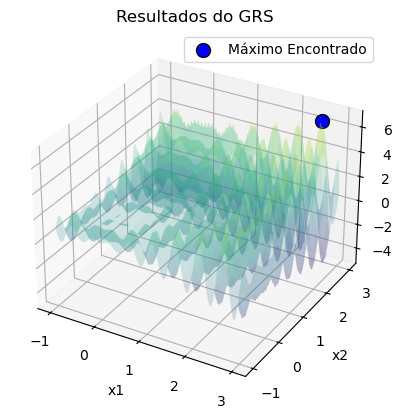

In [15]:
def f(x1, x2):
    return x1 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2) + 1

num_rounds = 100
optimization_type = 'maximization'
domain = [(-1, 3), (-1, 3)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 7

Moda das soluções encontradas: ModeResult(mode=array([0., 0.]), count=array([3., 2.])), f(ModeResult(mode=array([0., 0.]), count=array([3., 2.]))) = [-3.67558011e-07 -8.54695063e-06]


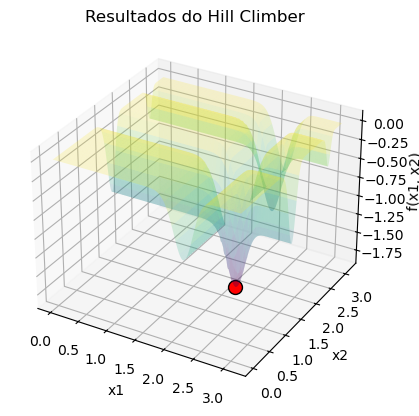

Moda das soluções encontradas: ModeResult(mode=array([0., 0.]), count=array([3., 1.])), f(ModeResult(mode=array([0., 0.]), count=array([3., 1.]))) = [-3.67558011e-07 -2.55738045e-05] (mínimo)


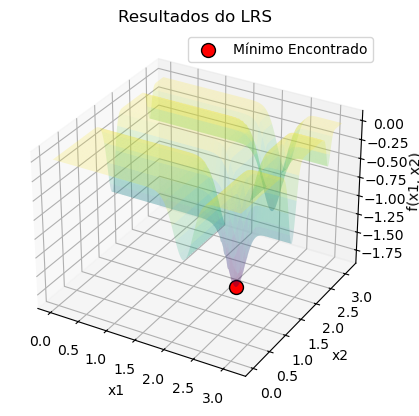

Moda das soluções encontradas: ModeResult(mode=array([2.03309845, 1.49736913]), count=array([1., 1.])), f(ModeResult(mode=array([2.03309845, 1.49736913]), count=array([1., 1.]))) = [-4.63657140e-01 -2.33872689e-04] (mínimo)


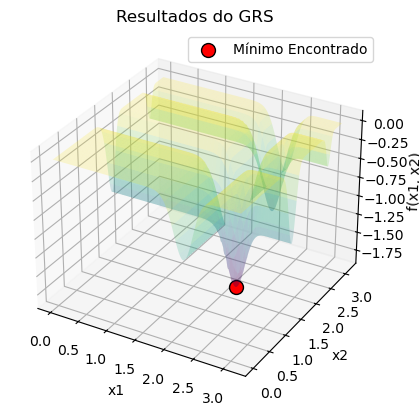

In [16]:
def f(x1, x2):
    return -np.sin(x1) * np.sin(x1**2 / np.pi)**20 - np.sin(x2) * np.sin(2 * x2**2 / np.pi)**20

num_rounds = 100
optimization_type = 'minimization'
domain = [(0, np.pi), (0, np.pi)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

### Q1 - 8

Moda das soluções encontradas: ModeResult(mode=array([-200., -200.]), count=array([6., 6.])), f(ModeResult(mode=array([-200., -200.]), count=array([6., 6.]))) = [-68.054403 -68.054403]


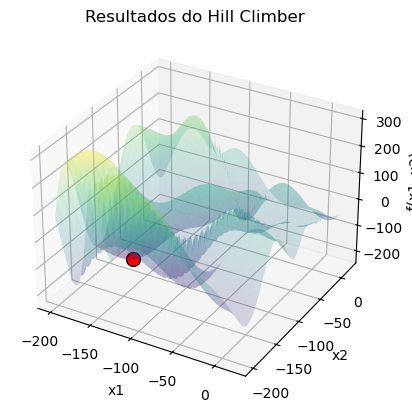

Moda das soluções encontradas: ModeResult(mode=array([-200.,   20.]), count=array([4., 4.])), f(ModeResult(mode=array([-200.,   20.]), count=array([4., 4.]))) = [-60.42759912 -37.83253521] (mínimo)


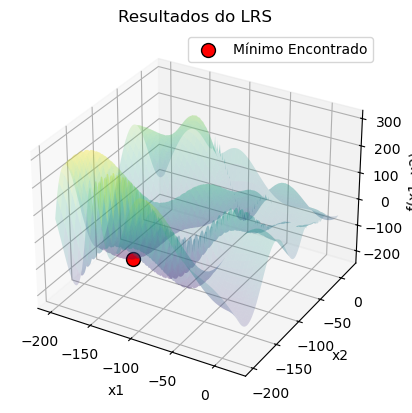

Moda das soluções encontradas: ModeResult(mode=array([-178.40653762, -103.3385806 ]), count=array([1., 1.])), f(ModeResult(mode=array([-178.40653762, -103.3385806 ]), count=array([1., 1.]))) = [103.04830615 -72.18087942] (mínimo)


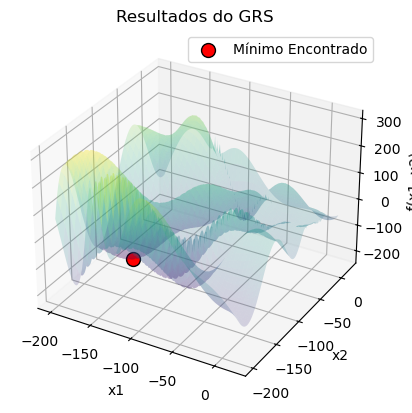

In [17]:
def f(x1, x2):
    return  -(x2 + 47) * np.sin(np.sqrt(np.abs(x1/2 + (x2 + 47)))) - x1 * np.sin(np.sqrt(np.abs(x1 - (x2 + 47))))

num_rounds = 100
optimization_type = 'minimization'
domain = [(-200, 20), (-200, 20)]
sigma = 0.1

hill_climber = HillClimber(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
hill_climber.run()
hill_climber.plot_results()

lrs_min = LRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds, sigma=sigma)
lrs_min.run()
lrs_min.plot_results()

grs_max = GRS(objective_function=f, optimization_type=optimization_type, domain=domain, num_rounds=num_rounds)
grs_max.run()
grs_max.plot_results()

## Parte 2 - Oito Rainhas

Nova solução encontrada: [3, 6, 8, 2, 4, 1, 7, 5]


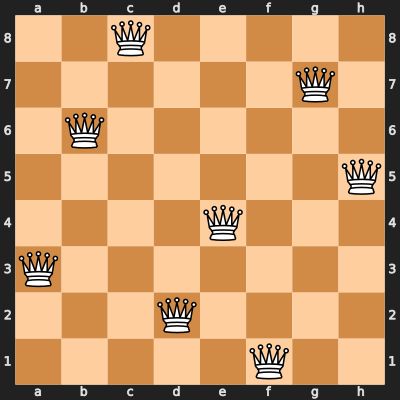

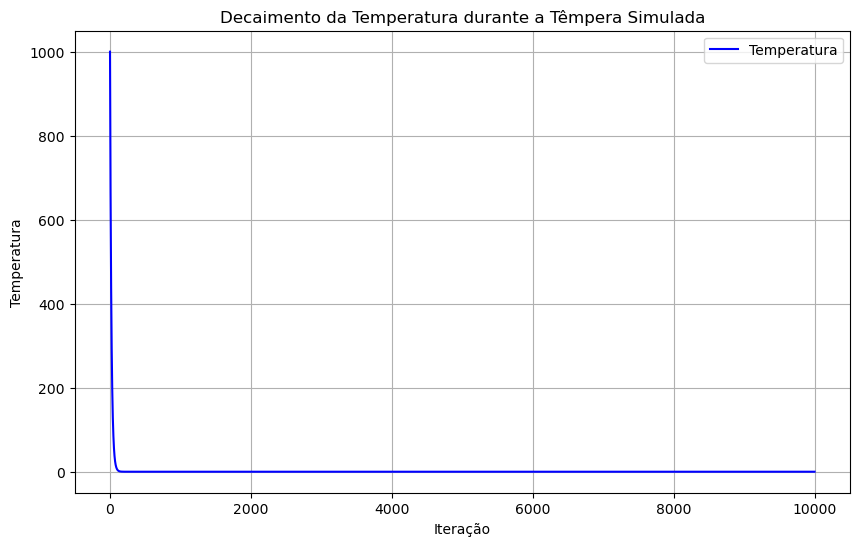

Total de soluções encontradas: 1
Nova solução encontrada: [5, 7, 1, 3, 8, 6, 4, 2]


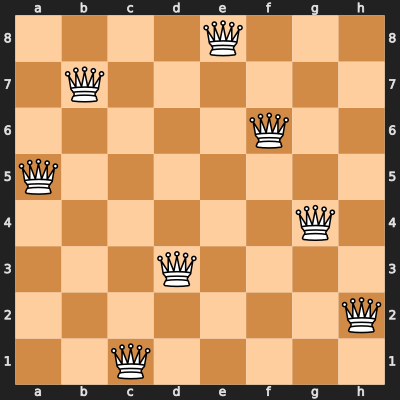

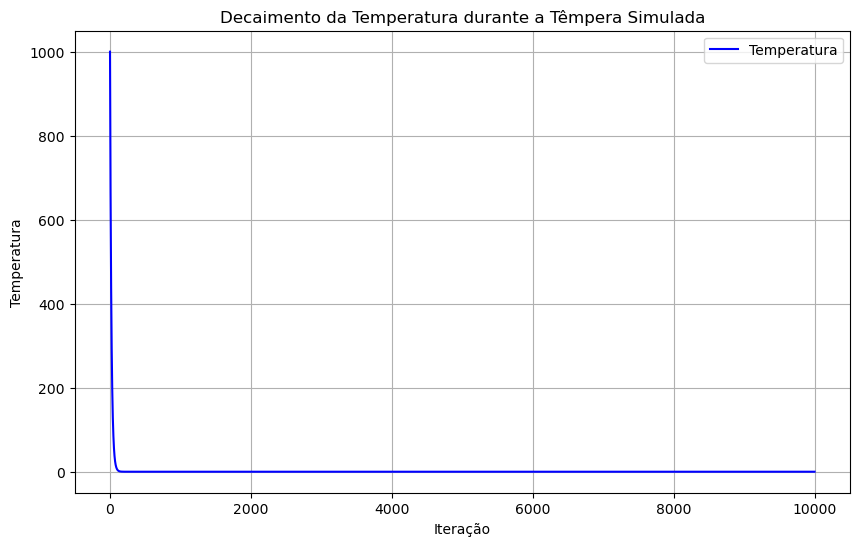

Total de soluções encontradas: 2
Nova solução encontrada: [3, 6, 4, 2, 8, 5, 7, 1]


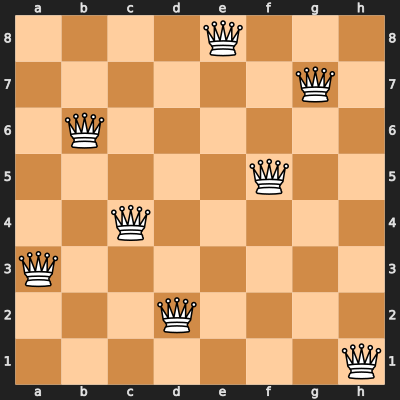

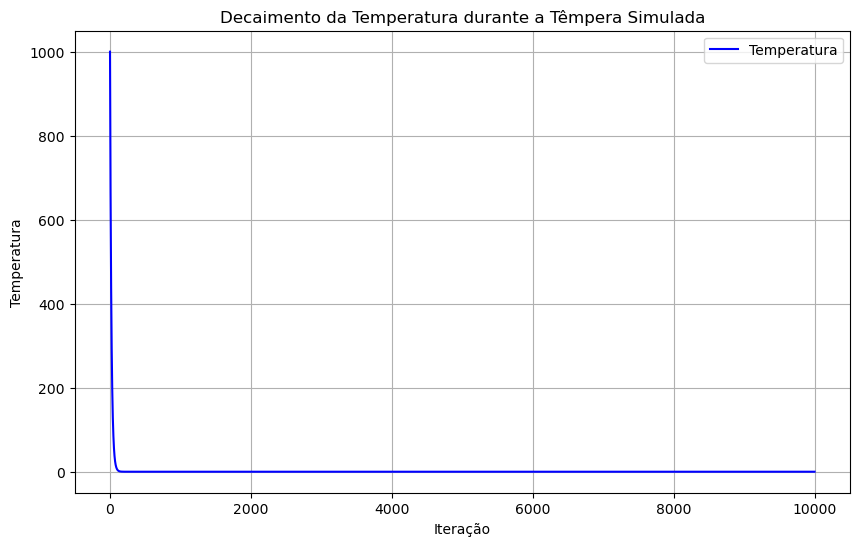

Total de soluções encontradas: 3
Nova solução encontrada: [4, 1, 5, 8, 2, 7, 3, 6]


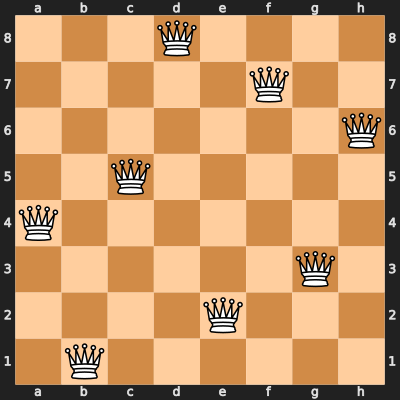

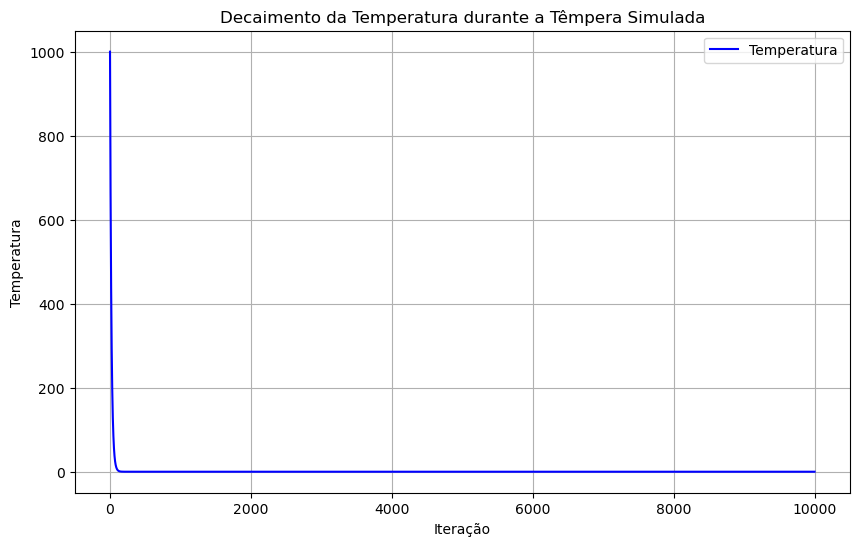

Total de soluções encontradas: 4
Nova solução encontrada: [2, 4, 6, 8, 3, 1, 7, 5]


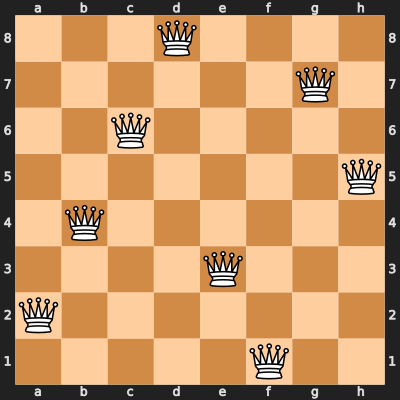

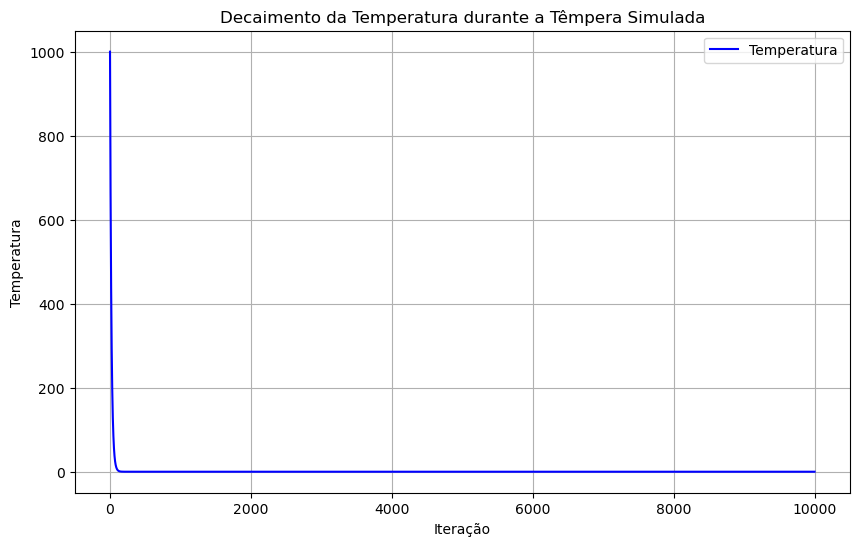

Total de soluções encontradas: 5
Nova solução encontrada: [4, 2, 8, 6, 1, 3, 5, 7]


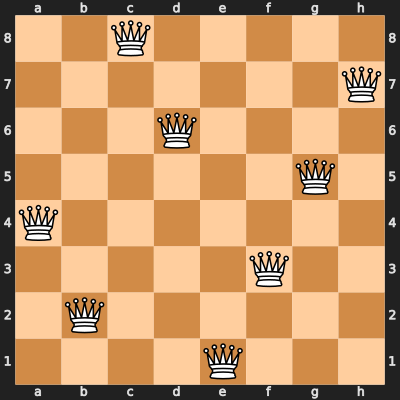

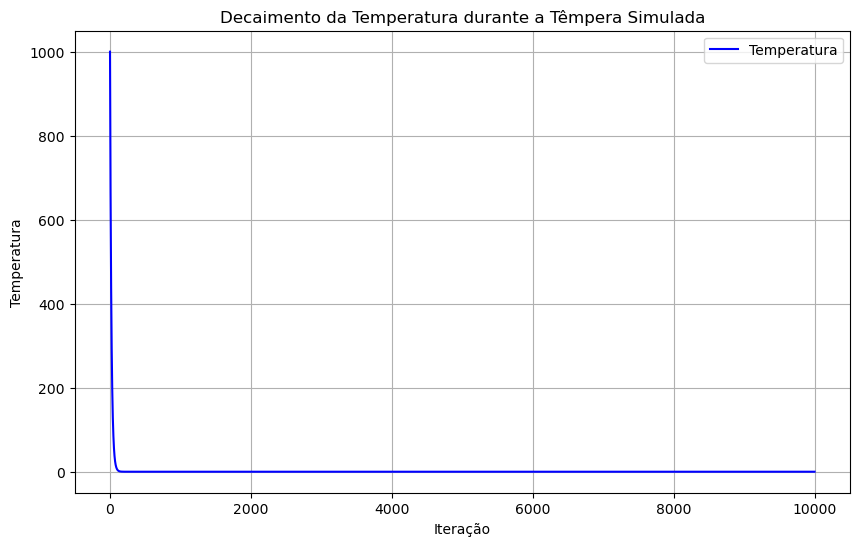

Total de soluções encontradas: 6
Nova solução encontrada: [6, 3, 7, 4, 1, 8, 2, 5]


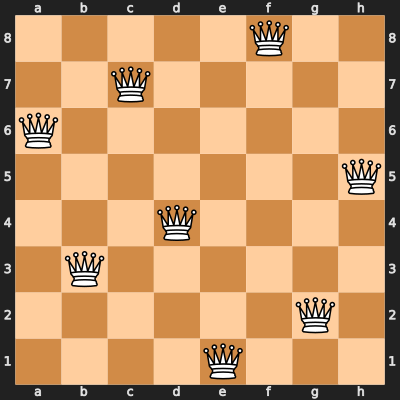

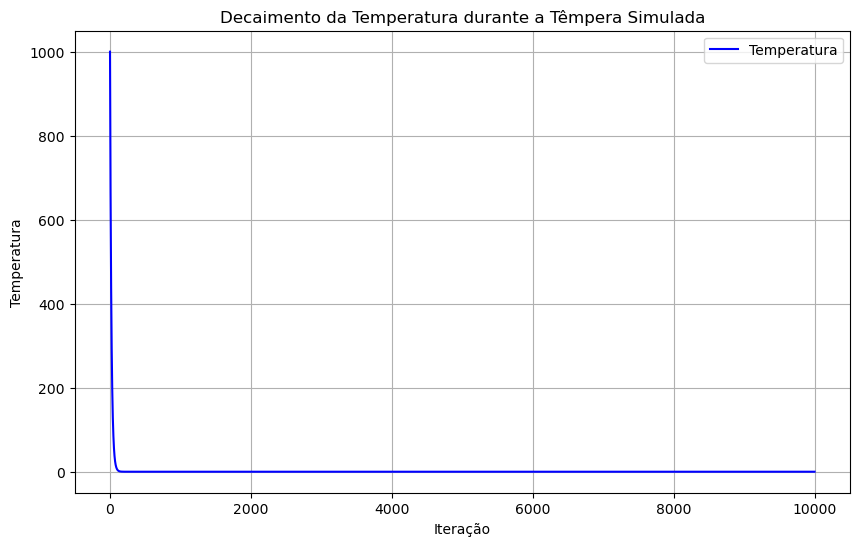

Total de soluções encontradas: 7


KeyboardInterrupt: 

In [18]:
import random
import math
import matplotlib.pyplot as plt
import chess
import chess.svg
from IPython.display import SVG, display

def mostrar_tabuleiro(solucao):
    board = chess.Board()
    board.clear()
    
    for coluna, linha in enumerate(solucao):
        board.set_piece_at(chess.square(coluna, linha - 1), chess.Piece(chess.QUEEN, chess.WHITE))
    
    display(SVG(chess.svg.board(board=board, size=400)))

def funcao_avaliacao(x):
    n = len(x)
    ataques = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if x[i] == x[j] or abs(x[i] - x[j]) == abs(i - j):
                ataques += 1
                
    return 28 - ataques

def decaimento_temperatura(temperatura, taxa_decaimento=0.95):
    return temperatura * taxa_decaimento

def perturbar_solucao(solucao):
    nova_solucao = solucao[:]
    i, j = random.sample(range(len(solucao)), 2)
    nova_solucao[i], nova_solucao[j] = nova_solucao[j], nova_solucao[i]
    return nova_solucao

def tempera_simulada(temperatura_inicial, num_iteracoes, taxa_decaimento):
    solucao_atual = [random.randint(1, 8) for _ in range(8)]
    melhor_solucao = solucao_atual[:]
    melhor_aptidao = funcao_avaliacao(melhor_solucao)
    temperatura = temperatura_inicial

    temperaturas = []

    for _ in range(num_iteracoes):
        temperaturas.append(temperatura)
        
        nova_solucao = perturbar_solucao(solucao_atual)
        nova_aptidao = funcao_avaliacao(nova_solucao)
        delta_aptidao = nova_aptidao - funcao_avaliacao(solucao_atual)
        
        if delta_aptidao > 0 or random.random() < math.exp(delta_aptidao / temperatura):
            solucao_atual = nova_solucao
        
        if funcao_avaliacao(solucao_atual) > melhor_aptidao:
            melhor_solucao = solucao_atual[:]
            melhor_aptidao = funcao_avaliacao(melhor_solucao)
        
        temperatura = decaimento_temperatura(temperatura, taxa_decaimento)
    
    return melhor_solucao, melhor_aptidao, temperaturas

def encontrar_solucoes_unicas():
    todas_solucoes = set()
    temperatura_inicial = 1000
    num_iteracoes = 10000
    taxa_decaimento = 0.95

    while len(todas_solucoes) < 92:
        solucao, aptidao, temperaturas = tempera_simulada(temperatura_inicial, num_iteracoes, taxa_decaimento)
        if aptidao == 28:
            solucao_tupla = tuple(solucao)
            if solucao_tupla not in todas_solucoes:
                todas_solucoes.add(solucao_tupla)
                print(f"Nova solução encontrada: {solucao}")
                mostrar_tabuleiro(solucao)
                plt.figure(figsize=(10, 6))
                plt.plot(temperaturas, label='Temperatura', color='blue')
                plt.xlabel('Iteração')
                plt.ylabel('Temperatura')
                plt.title('Decaimento da Temperatura durante a Têmpera Simulada')
                plt.legend()
                plt.grid(True)
                plt.show()
                print(f"Total de soluções encontradas: {len(todas_solucoes)}")
    
    return todas_solucoes

todas_solucoes = encontrar_solucoes_unicas()

print("Total de 92 soluções encontradas:")
for solucao in todas_solucoes:
    print(solucao)


## Parte 3 - O Problema do Drone Viajante

In [2]:
class City:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def distance(self, city):
        return np.sqrt((self.x - city.x)**2 + (self.y - city.y)**2 + (self.z - city.z)**2)
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + "," + str(self.z) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [33]:
def createRoute(cityList):
    start_city = cityList[0]
    remaining_cities = cityList[1:]
    random.shuffle(remaining_cities)
    route = [start_city] + remaining_cities
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [24]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Distância inicial: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Distância final: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [15]:
df = pd.read_csv('./data/CaixeiroSimples.csv').values

cityList = []

for i in range(len(df)):
    cityList.append(City(x=df[i][0], y=df[i][1], z=df[i][2]))

In [39]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Distância inicial: 2236.6469515927
Distância final: 1786.260920870668


[(11.765763827998494,23.7479734088764,36.74074993105402),
 (28.78187933812493,4.355662867704918,6.775537865489326),
 (7.557837865311674,21.23663173293085,26.448048001123453),
 (12.357228353086471,25.824802650746363,34.575926598996524),
 (23.090498166968896,13.756404303078767,23.71258585639332),
 (24.671605640871185,34.0065870624864,16.78804226236194),
 (14.386667140944509,43.895637416671875,26.15528630197102),
 (10.694480619555048,48.16543012830613,24.928174114122395),
 (18.556708016512964,35.14590203510684,26.272431468678622),
 (20.83542750026321,48.22077375881652,3.2384685610137214),
 (12.631552858362117,49.60149909987366,16.793605180628944),
 (18.40519541670164,26.59502237793078,6.887482035087338),
 (18.013461212853034,29.38588958972815,4.679106275407598),
 (26.018535655440477,42.7619828788212,9.345162270340095),
 (32.979096469848365,31.746357321685412,10.069235112641044),
 (15.62302973271644,25.593607525315687,8.941346636509234),
 (19.952211232235182,30.468473862565595,28.666938513

In [34]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    # Plote o gráfico de progresso
    plt.figure(figsize=(10, 6))
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    # Plote o gráfico 3D da melhor rota
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    # Assume que a população contém as coordenadas x, y, z das cidades
    x = [city.x for city in bestRoute]
    y = [city.y for city in bestRoute]
    z = [city.z for city in bestRoute]
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, 'o-', markersize=5, linewidth=2, label='Rota')
    
    # Adiciona a primeira cidade no final para fechar o circuito
    ax.plot([x[0]], [y[0]], [z[0]], 'ro', markersize=10)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Melhor rota encontrada')
    plt.legend()
    plt.show()
    

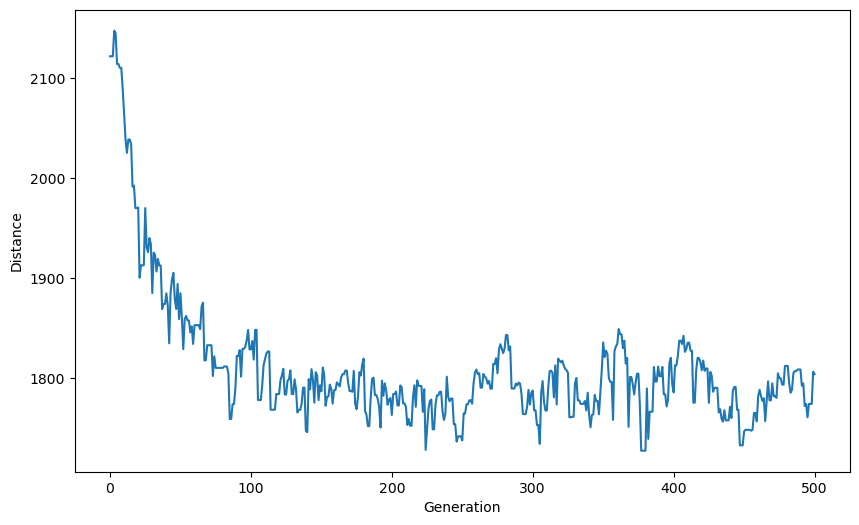

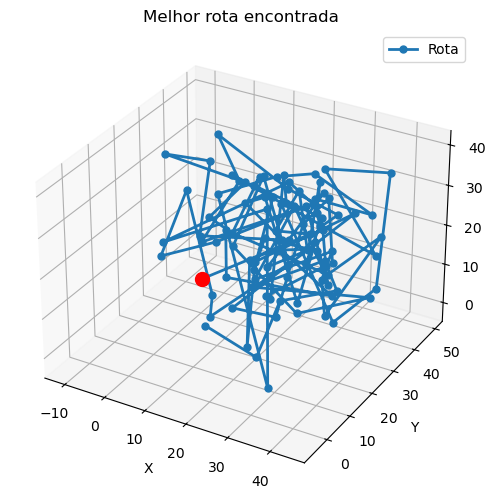

In [35]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)